In [1172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1173]:
df=pd.read_csv("INFY.csv",index_col='Date',parse_dates=True)

In [1174]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856


# Data Preprocessing

In [1175]:
df['Date']=df.index

In [1176]:
start_date='2016-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [1177]:
df=df.loc[mask]

In [1178]:
df=df.ffill()

In [1179]:
df['Prev Close'].isnull().values.any()

False

In [1180]:
df=df.drop(columns=['Date','Symbol','Series'])

In [1181]:
df.dropna(inplace=True)

<AxesSubplot:>

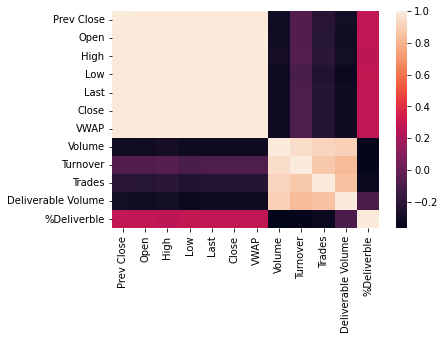

In [1182]:
sn.heatmap(df.corr())

In [1183]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1305, freq='B')

In [1184]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [1185]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [1186]:
Decomp_results=seasonal_decompose(df['Prev Close'])

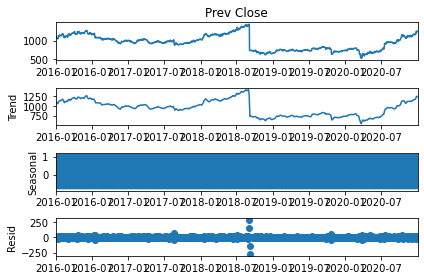

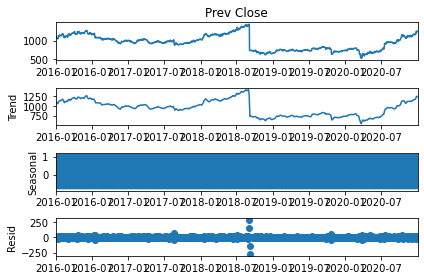

In [1187]:
Decomp_results.plot()

In [1188]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [1189]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [1190]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-11645.321, Time=1.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-11177.461, Time=0.77 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11634.080, Time=0.87 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-11474.285, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2081.872, Time=0.76 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-11642.803, Time=1.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-11465.854, Time=1.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-11640.897, Time=1.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-11641.850, Time=1.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11643.352, Time=1.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-11645.485, Time=1.34 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-11561.721, Time=1.31 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-11647.385, Time=1.62 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-11578.304, Time=1.41 sec
 ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-9804.576, Time=1.56 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=-9722.004, Time=1.71 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=-9804.346, Time=1.62 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=-11638.807, Time=1.68 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0] intercept
Total fit time: 31.602 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1305
Model:               SARIMAX(3, 0, 5)   Log Likelihood                5854.963
Date:                Sun, 25 Sep 2022   AIC                         -11667.925
Time:                        11:49:09   BIC                         -11559.272
Sample:                             0   HQIC                        -11627.166
                               - 1305                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0009   4.23e-36  -2.21e+32      0.000      -0.001      -0.001
x1             1.0000   7.94e-34   1.26e+33      0.000       1.000       1.000
x2         -1.554e-15   8.13e-34  -1.91e+18      0.000   -1.55e-15   -1.55e-15
x3         -8.438e-15   8.29e-34  -1.02e+19      0.000   -8.44e-15   -8.44e-15
x4          3.109e-15   6.51e-34   4.78e+18      0.000    3.11e-15    3.11e-15
x5          4.552e-15   6.75e-34   6.74e+18      0.000    4.55e-15    4.55e-15
x6          -1.51e-14   6.79e-34  -2.22e+19      0.000   -1.51e-14   -1.51e-14
x7          1.776e-15   7.09e-34    2.5e+18      0.000    1.78e-15    1.78e-15
x8          1.969e-17   1.85e-28   1.07e+11      0.000    1.97e-17    1.97e-17
x9          6.059e-18   1.63e-20    370.791      0.000    6.03e-18    6.09e-18
x10        -2.918e-15   2.48e-30  -1.18e+15      0.000   -2.92e-15   -2.92e-15
x11         3.316e-17   7.37e-29    4.5e+11      0.000    3.32e-17    3.32e-17
ar.L1          0.0075   2.81e-38   2.66e+35      0.000       0.007       0.007
ar.L2          0.5103   1.14e-38   4.47e+37      0.000       0.510       0.510
ar.L3          0.2393   1.43e-38   1.67e+37      0.000       0.239       0.239
ma.L1          0.4590   1.61e-38   2.85e+37      0.000       0.459       0.459
ma.L2         -0.2662   2.13e-39  -1.25e+38      0.000      -0.266      -0.266
ma.L3         -0.2777   3.05e-39  -9.11e+37      0.000      -0.278      -0.278
ma.L4         -0.0766   4.15e-39  -1.85e+37      0.000      -0.077      -0.077
ma.L5         -0.0095   2.51e-39  -3.79e+36      0.000      -0.009      -0.009
sigma2      7.469e-06   6.36e-33   1.17e+27      0.000    7.47e-06    7.47e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            535048.38
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -7.67
Prob(H) (two-sided):                  0.00   Kurtosis:                       101.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.27e+53. Standard errors may be unstable.
"""

# ARIMAX

In [1191]:
model_arimax=ARIMA(train,exog=exo_train,order=(3,1,3))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                  913
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3218.238
Method:                       css-mle   S.D. of innovations             70.698
Date:                Sun, 25 Sep 2022   AIC                           6474.477
Time:                        11:49:10   BIC                           6565.995
Sample:                    01-04-2016   HQIC                          6509.413
                         - 07-03-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008      1.544     -0.000      1.000      -3.027       3.026
Prev Close            -0.9889      0.011    -88.174      0.000      -1.011      -0.967
Open                   0.0506      0.045      1.124      0.261      -0.038       0.139
High                  -0.0454      0.069     -0.659      0.510      -0.181       0.090
Low                    0.8053      0.098      8.225      0.000       0.613       0.997
Last                  -0.1423      0.134     -1.060      0.289      -0.405       0.121
Close                  0.0858      0.159      0.538      0.590      -0.227       0.398
VWAP                   0.2428      0.126      1.920      0.055      -0.005       0.491
Volume              2.576e-08        nan        nan        nan         nan         nan
Turnover            4.775e-15        nan        nan        nan         nan         nan
Trades             -1.651e-06        nan        nan        nan         nan         nan
Deliverable Volume -5.112e-07        nan        nan        nan         nan         nan
ar.L1.D.Low            0.0016      6.422      0.000      1.000     -12.586      12.589
ar.L2.D.Low           -0.0019      2.114     -0.001      0.999      -4.144       4.141
ar.L3.D.Low            0.0002        nan        nan        nan         nan         nan
ma.L1.D.Low            0.0016      6.400      0.000      1.000     -12.542      12.546
ma.L2.D.Low           -0.0019      2.119     -0.001      0.999      -4.155       4.152
ma.L3.D.Low            0.0002        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.6777          -14.3753j           15.4559           -0.3099
AR.2           -5.6777          +14.3753j           15.4559            0.3099
AR.3           20.3590           -0.0000j           20.3590           -0.0000
MA.1          -14.2864           -0.0000j           14.2864           -0.5000
MA.2           11.6450          -14.3116j           18.4507           -0.1413
MA.3           11.6450          +14.3116j           18.4507            0.1413
-----------------------------------------------------------------------------
"""

# SARIMAX

In [1192]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(3,1,3),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                  914
Model:               SARIMAX(3, 1, 3)   Log Likelihood                3553.126
Date:                Sun, 25 Sep 2022   AIC                          -7070.251
Time:                        11:49:11   BIC                          -6983.550
Sample:                    01-01-2016   HQIC                         -7037.154
                         - 07-03-2019                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close         -2.578e-13   4.56e-35  -5.66e+21      0.000   -2.58e-13   -2.58e-13
Open                3.087e-12    3.9e-35   7.91e+22      0.000    3.09e-12    3.09e-12
High               -9.437e-13   3.46e-35  -2.73e+22      0.000   -9.44e-13   -9.44e-13
Low                    1.0000   8.02e-35   1.25e+34      0.000       1.000       1.000
Last               -8.279e-13   6.08e-35  -1.36e+22      0.000   -8.28e-13   -8.28e-13
Close               2.984e-13   5.63e-35    5.3e+21      0.000    2.98e-13    2.98e-13
VWAP                1.179e-12   4.14e-35   2.85e+22      0.000    1.18e-12    1.18e-12
Volume             -1.998e-17   7.54e-29  -2.65e+11      0.000      -2e-17      -2e-17
Turnover            4.883e-18   7.02e-21    695.887      0.000    4.87e-18     4.9e-18
Trades              1.864e-16   1.15e-30   1.63e+14      0.000    1.86e-16    1.86e-16
Deliverable Volume   1.17e-16   3.72e-29   3.15e+12      0.000    1.17e-16    1.17e-16
ar.L1                 -1.5713   1.43e-38   -1.1e+38      0.000      -1.571      -1.571
ar.L2                 -0.5487   2.35e-39  -2.34e+38      0.000      -0.549      -0.549
ar.L3                  0.2364   5.89e-39   4.01e+37      0.000       0.236       0.236
ma.L1                       0    1.5e-38          0      1.000   -2.94e-38    2.94e-38
ma.L2                       0   7.42e-39          0      1.000   -1.45e-38    1.45e-38
ma.L3                      -0   8.12e-39         -0      1.000   -1.59e-38    1.59e-38
sigma2              3.117e-06   5.46e-33   5.71e+26      0.000    3.12e-06    3.12e-06
===================================================================================
Ljung-Box (L1) (Q):                 104.62   Jarque-Bera (JB):            111973.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -2.25
Prob(H) (two-sided):                  0.80   Kurtosis:                        57.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+53. Standard errors may be unstable.
"""

# Prediction

In [1193]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [1194]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [1195]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

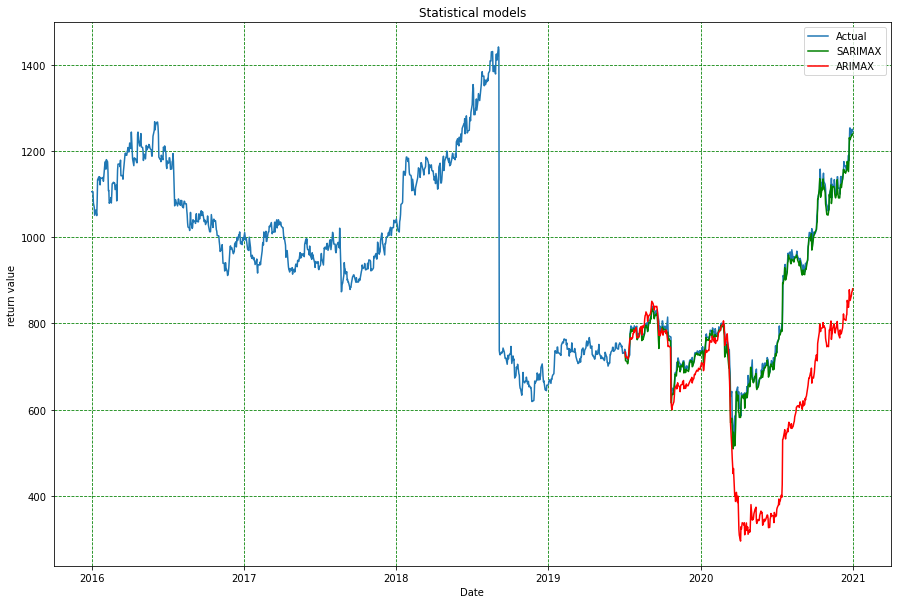

In [1196]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [1197]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

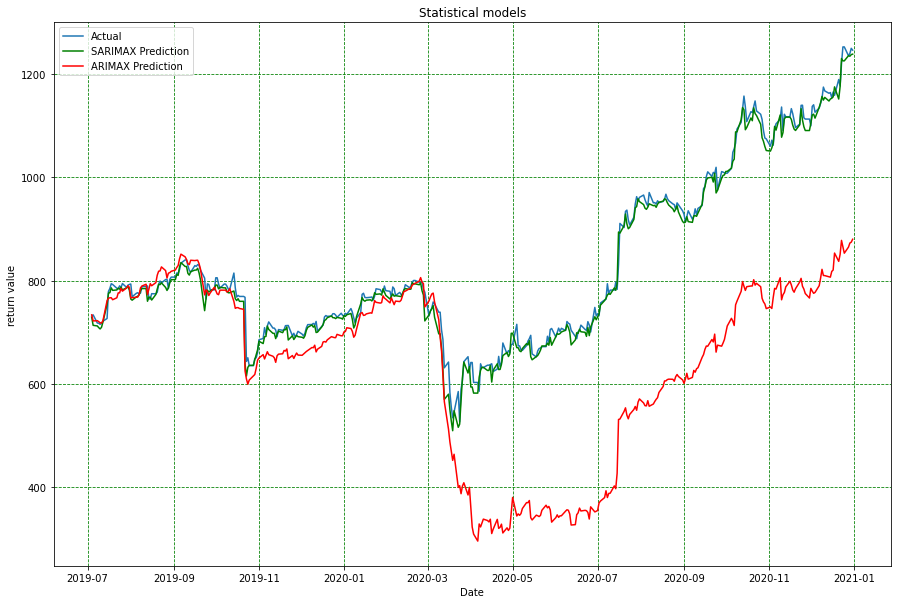

In [1198]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [1199]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

246.3141396660211


In [1200]:
error=mean_absolute_error(test,pred_arimax)
print(error)

188.73984108618012


In [1201]:
r2_score(test,pred_arimax)

-1.2095758870098061

    SARIMAX

In [1202]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

17.56364510258476


In [1203]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

11.43278446193172


In [1204]:
r2_score(test,pred_sarimax)

0.9887653501486603